In [ ]:
# Check to see if geopandas is already loaded into your Colab environment: will return True or False
import sys
'geopandas' in sys.modules

False

In [ ]:
# Install packages as needed
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

# Importing all the libraries we'll use
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request#new
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon

     |████████████████████████████████| 1.0MB 6.9MB/s 
     |████████████████████████████████| 6.6MB 22.0MB/s 
     |████████████████████████████████| 15.3MB 263kB/s 
     |████████████████████████████████| 2.0MB 7.8MB/s 
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [ ]:
url = 'https://www.gutenberg.org/cache/epub/175/pg175.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')

<class 'str'>, 
504768, 
﻿The Project Gutenberg EBook of The Phantom of the Opera, by Gaston Leroux

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: The Phantom of the Opera

Author: Gaston Leroux

Release Date: June 9, 2008 [EBook #175]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOO


In [ ]:
places = GeoText(raw)
cities = list(places.cities)
cities #Calling this shows my list of cities. You could also use print(cities)

['Paris',
 'Paris',
 'Paris',
 'Of',
 'Providence',
 'Of',
 'Brest',
 'Paris',
 'Paris',
 'Paris',
 'Of',
 'Humble',
 'Of',
 'Lannion',
 'Most',
 'Paris',
 'Lannion',
 'Paris',
 'Pomona',
 'Daphne',
 'Of',
 'Paris',
 'Of',
 'Paris',
 'Man',
 'Paris',
 'Paris',
 'Paris',
 'Venice',
 'Man',
 'Paris',
 'Paris',
 'Of',
 'Surprise',
 'Of',
 'Of',
 'Of',
 'Paris',
 'Paris',
 'Paris',
 'Brussels',
 'Rivoli',
 'March',
 'Bend',
 'Of',
 'Paris',
 'Lahore',
 'Paris',
 'Of',
 'Lahore',
 'Paris',
 'Paris',
 'Paris',
 'Of',
 'Of',
 'Rouen',
 'Asia',
 'Paris',
 'Of',
 'March',
 'Of',
 'Mission',
 'Fairbanks',
 'Salt Lake',
 'Most']

In [ ]:
geolocator = Nominatim(user_agent='khisam@clarku.edu', timeout=2) # requires your e-mail address to track usage. Timeout set for 2 seconds.

lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s">
          (city, e))
lat_lon

[Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Of, Trabzon, Karadeniz Bölgesi, 61830, Türkiye, (40.881735899999995, 40.27544376928809, 0.0)),
 Location(Providence, Providence County, Rhode Island, United States, (41.8239891, -71.4128343, 0.0)),
 Location(Of, Trabzon, Karadeniz Bölgesi, 61830, Türkiye, (40.881735899999995, 40.27544376928809, 0.0)),
 Location(Brest, Finistère, Bretagne, France métropolitaine, 29200, France, (48.3905283, -4.4860088, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Of, T

In [ ]:
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)"
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)"
2,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)"
3,"Of, Trabzon, Karadeniz Bölgesi, 61830, Türkiye","(40.881735899999995, 40.27544376928809)"
4,"Providence, Providence County, Rhode Island, U...","(41.8239891, -71.4128343)"
5,"Of, Trabzon, Karadeniz Bölgesi, 61830, Türkiye","(40.881735899999995, 40.27544376928809)"
6,"Brest, Finistère, Bretagne, France métropolita...","(48.3905283, -4.4860088)"


In [ ]:
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

In [ ]:
# coordinate system we're using
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,City Name,Coordinates,geometry
0,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",POINT (2.35146 48.85670)
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",POINT (2.35146 48.85670)
2,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",POINT (2.35146 48.85670)
3,"Of, Trabzon, Karadeniz Bölgesi, 61830, Türkiye","(40.881735899999995, 40.27544376928809)",POINT (40.27544 40.88174)
4,"Providence, Providence County, Rhode Island, U...","(41.8239891, -71.4128343)",POINT (-71.41283 41.82399)


In [ ]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.cpg.txt to Countries_WGS84.cpg.txt


In [ ]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84 (1).dbf to Countries_WGS84 (1).dbf


In [ ]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.prj.txt to Countries_WGS84.prj.txt


In [ ]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.shp to Countries_WGS84.shp


In [ ]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.shx to Countries_WGS84.shx


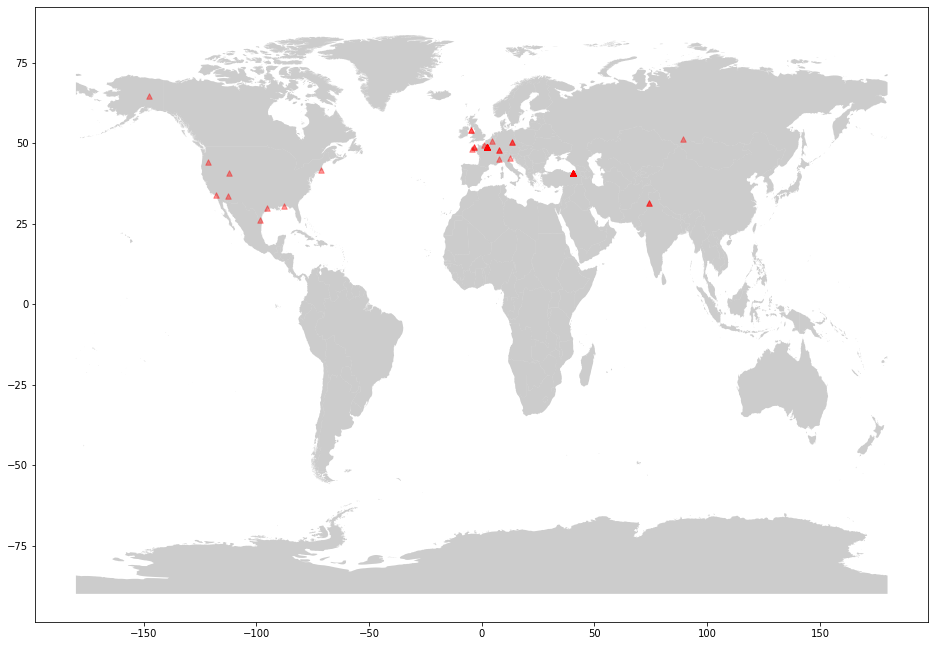

In [ ]:
# world map .shp file we down/uploaded
countries_map = gpd.read_file('Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

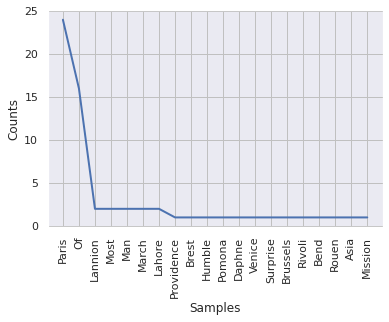

In [ ]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(cities)
freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20

In [ ]:
#import required libraries, packages, etc.
import folium
from folium import plugins
import json

In [ ]:
# Converting geopandas dataframe to geojson so it can be plotted on a web map with folium.
geo_df['geometry'].to_file("Cities.geojson", driver='GeoJSON')

# initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
PhantomMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Terrain', zoom_start=2)

folium.GeoJson("Cities.geojson").add_to(PhantomMap)

# Display your map   
PhantomMap